# Notes

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
g = nx.Graph()

In [14]:
e = list(zip('A A A B B C C D E E F T'.split(), 'K B C C K E F E F H G J'.split()))

In [15]:
g.add_edges_from(e)

In [16]:
g.edges()

[('A', 'K'),
 ('A', 'B'),
 ('A', 'C'),
 ('K', 'B'),
 ('B', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'D'),
 ('E', 'F'),
 ('E', 'H'),
 ('F', 'G'),
 ('T', 'J')]

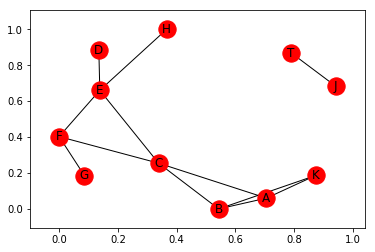

In [17]:
nx.draw_networkx(g)

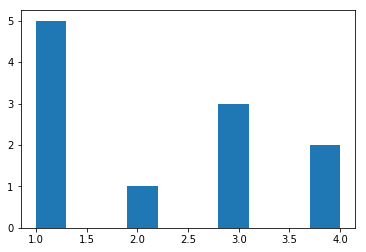

In [18]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
plot_degree_dist(g)

In [19]:
#Local clustering coefficient:

#(For nodes of degree <= 2, assume LCCoeff of 0)
nx.clustering(g, 'F'), nx.clustering(g, 'A'), nx.clustering(g, 'J')

(0.3333333333333333, 0.6666666666666666, 0.0)

In [20]:
nx.average_clustering(g)

0.28787878787878785

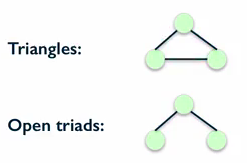
Transitivity: ratio of number of triangles and number of 'open triads' in a network

In [21]:
nx.transitivity(g)

0.4090909090909091

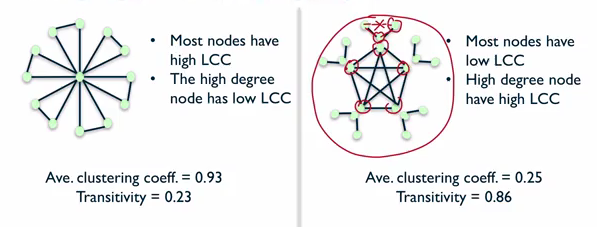
Distances
Path lenght: Number of edges between two nodes.

Distance: Least number of edges between two nodes.

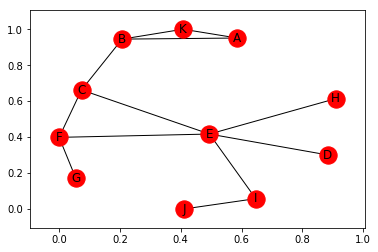

In [22]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'K'),
        ('A', 'B'),
        ('B', 'K'),
        ('B', 'C'),
        ('C', 'F'),
        ('C', 'E'),
        ('F', 'E'),
        ('F', 'G'),
        ('D', 'E'),
        ('E', 'H'),
        ('E', 'I'),
        ('I', 'J')
    ]
)
nx.draw_networkx(g)

In [23]:
nx.shortest_path(g, 'A', 'H')

['A', 'B', 'C', 'E', 'H']

In [24]:
nx.shortest_path_length(g, 'A', 'H')

4

Breadth-first search: Systematic procedure for computing distances from a node to all other nodes in a large network, by 'discovering' nodes in layers. For each leap/edge/iteration/layer, write down the nodes that were not accounted yet.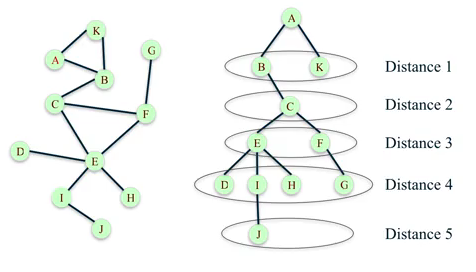

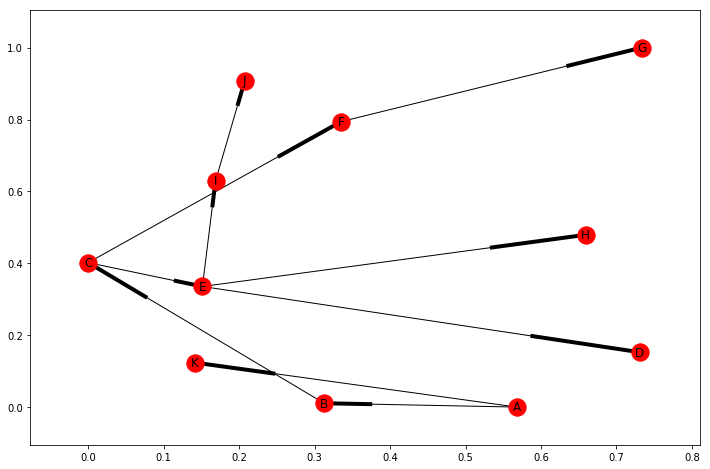

In [25]:
plt.figure(figsize=(12,8))

t = nx.bfs_tree(g, 'A')
nx.draw_networkx(t)

In [26]:
t.edges()

[('A', 'K'),
 ('A', 'B'),
 ('B', 'C'),
 ('C', 'F'),
 ('C', 'E'),
 ('F', 'G'),
 ('E', 'D'),
 ('E', 'H'),
 ('E', 'I'),
 ('I', 'J')]

In [27]:
nx.shortest_path_length(t, 'A')

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 1}

In [28]:
nx.average_shortest_path_length(g)

2.5272727272727273

In [29]:
nx.diameter(g)

5

In [30]:
nx.eccentricity(g)

{'A': 5,
 'B': 4,
 'C': 3,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 5}

In [31]:
nx.radius(g)

3

In [32]:
nx.periphery(g)

['A', 'K', 'J']

In [33]:
nx.center(g)

['C', 'F', 'E']

In [34]:
g = nx.karate_club_graph()
g = nx.convert_node_labels_to_integers(g, first_label=1)

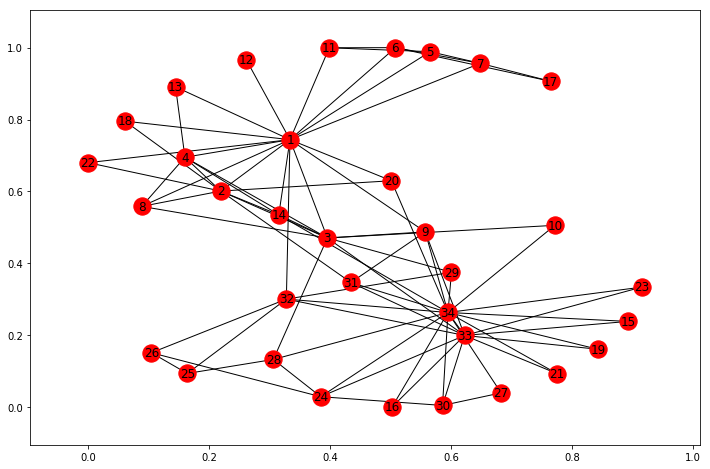

In [35]:
plt.figure(figsize=(12,8))
nx.draw_networkx(g)

In [36]:
def info(graph):
    s = 'radius = {0}\ndiameter = {1}\ncenter = {2}\nperiphery = {3}'
    return s.format(nx.radius(graph),
                    nx.diameter(graph),
                    nx.center(graph),
                    nx.periphery(graph))

In [37]:
print(info(g))

radius = 3
diameter = 5
center = [1, 2, 3, 4, 9, 14, 20, 32]
periphery = [17, 15, 16, 19, 21, 23, 24, 30, 27]


In [38]:
# Connected graphs
# An undirected graph is said to be connected when there's a path linking every pair of nodes

g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('A', 'E'), ('A', 'C'), ('A', 'N'), ('A', 'G'),
        ('B', 'A'), ('B', 'C'), ('B', 'D'), ('B', 'E'),
        ('C', 'A'), ('C', 'B'), ('C', 'D'), ('C', 'E'),
        ('D', 'C'), ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'), ('E', 'B'), ('E', 'A'),
        ('F', 'G'), ('F', 'I'), ('F', 'J'),        
        ('G', 'A'), ('G', 'F'), ('G', 'I'), ('G', 'H'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'H'), ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'G'), ('J', 'I'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'), ('K', 'O'),
        ('L', 'K'), ('L', 'O'), ('L', 'M'), ('L', 'N'),
        ('M', 'L'), ('M', 'K'),
        ('N', 'A'), ('N', 'L'), ('N', 'O'),
    ]
)

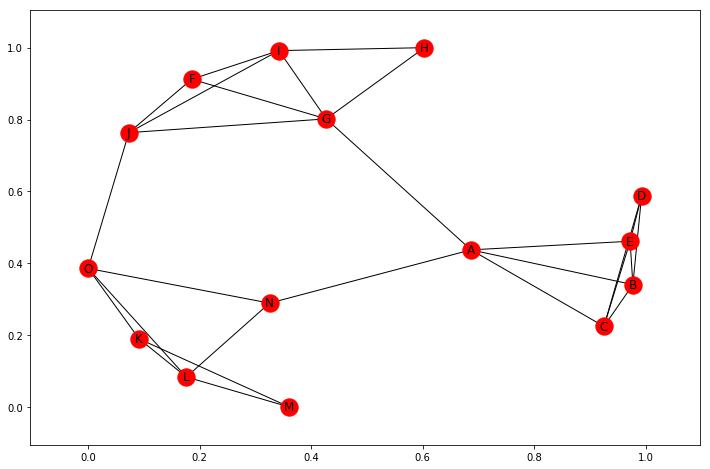

In [39]:
plt.figure(figsize=(12,8))
nx.draw_networkx(g)

In [40]:
nx.is_connected(g)

True

In [41]:
g_un = g.copy()

In [42]:
g_un.remove_edge('A','G')
g_un.remove_edge('A','N')
g_un.remove_edge('O','J')

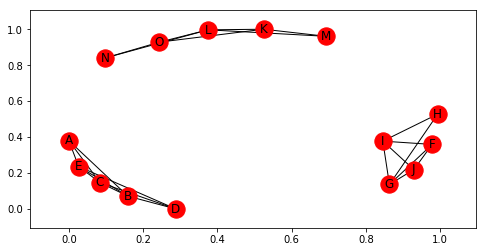

In [43]:
plt.figure(figsize=(8,4))
nx.draw_networkx(g_un)

In [44]:
nx.is_connected(g_un)

False

In [45]:
#Connected component:

#Subset of the graph, on which:
#- Every node in the subset as a path to every other node
#- No other node (from outside) has a path to any node in the subset
nx.number_connected_components(g_un)

3

In [46]:
sorted(nx.connected_components(g_un))

[{'A', 'B', 'C', 'D', 'E'},
 {'K', 'L', 'M', 'N', 'O'},
 {'F', 'G', 'H', 'I', 'J'}]

In [47]:
nx.node_connected_component(g_un, 'A')

{'A', 'B', 'C', 'D', 'E'}

In [48]:
nx.node_connected_component(g_un, 'H')

{'F', 'G', 'H', 'I', 'J'}

In [49]:
nx.node_connected_component(g_un, 'M')

{'K', 'L', 'M', 'N', 'O'}

Strongly connected: If for every pair of nodes (u, v) there's a directed path from u to v and vice-versa

Weakly connected: If replacing all directed edges with undirected edges produces a connected undirected graph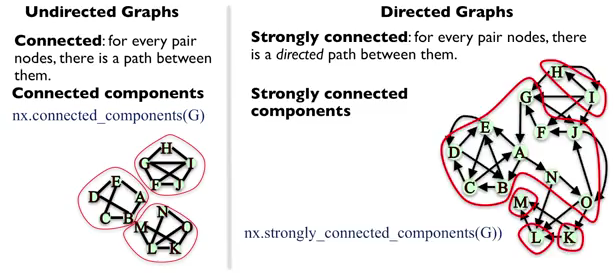
## Robustness
The ability to maintain its general structural properties when it faces failures or attacks (e.g.: removal of edges)

i.e.: maintain it's connectivity, like the world wide web, or flight path

In [ ]:
plt.figure(figsize=(7,3))
nx.draw_networkx(g)

In [ ]:
nx.edge_connectivity(g), nx.minimum_edge_cut(g)

In [ ]:
sorted(nx.all_simple_paths(g, 'G', 'L'))

In [51]:
#Plotting
layouts = [x for x in nx.__dir__() if x.endswith('_layout')]
layouts



['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

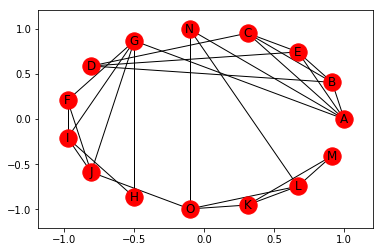

In [52]:
pos = nx.circular_layout(g)
nx.draw_networkx(g, pos)

# my favourite
#pos = nx.kamada_kawai_layout(g)
#nx.draw_networkx(g, pos)


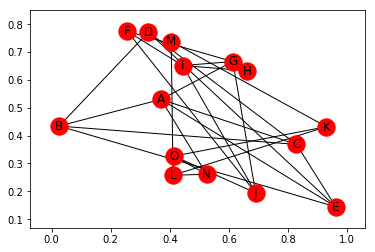

In [53]:
# really random, play it again!
pos = nx.random_layout(g) 
nx.draw_networkx(g, pos)

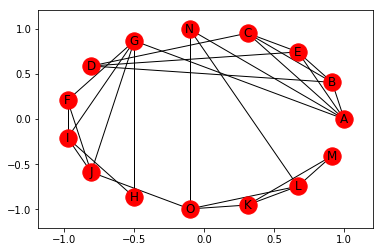

In [54]:
pos = nx.shell_layout(g)
nx.draw_networkx(g, pos)

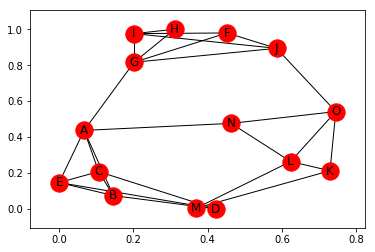

In [55]:
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)

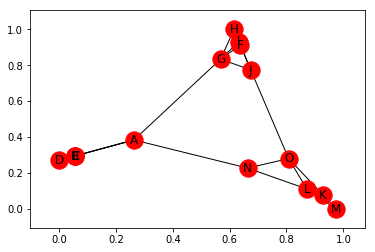

In [56]:
pos = nx.spectral_layout(g)
nx.draw_networkx(g, pos)

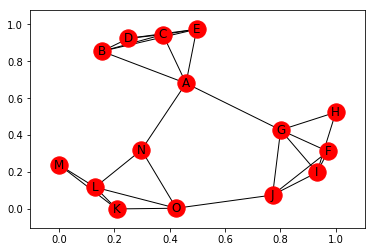

In [58]:
pos = nx.fruchterman_reingold_layout(g)
nx.draw_networkx(g, pos)

# Visualizing Networks

In [1]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

<IPython.core.display.Javascript object>


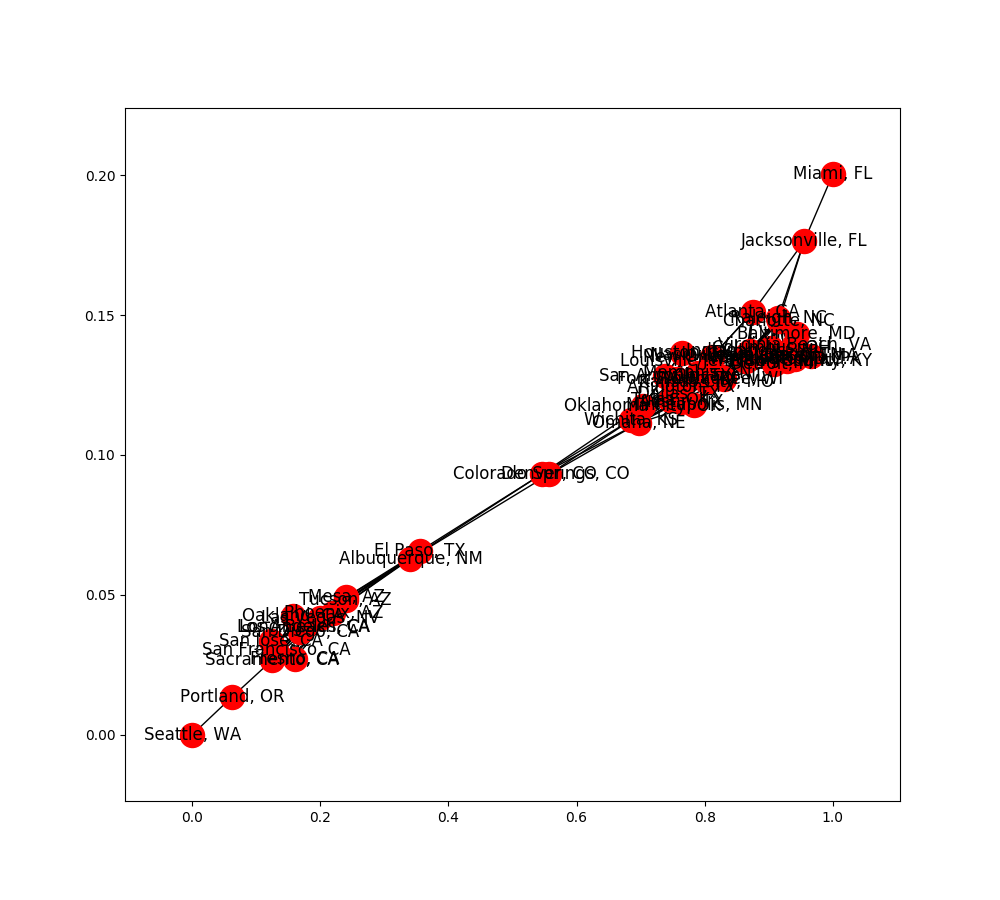

In [2]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [10]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<IPython.core.display.Javascript object>


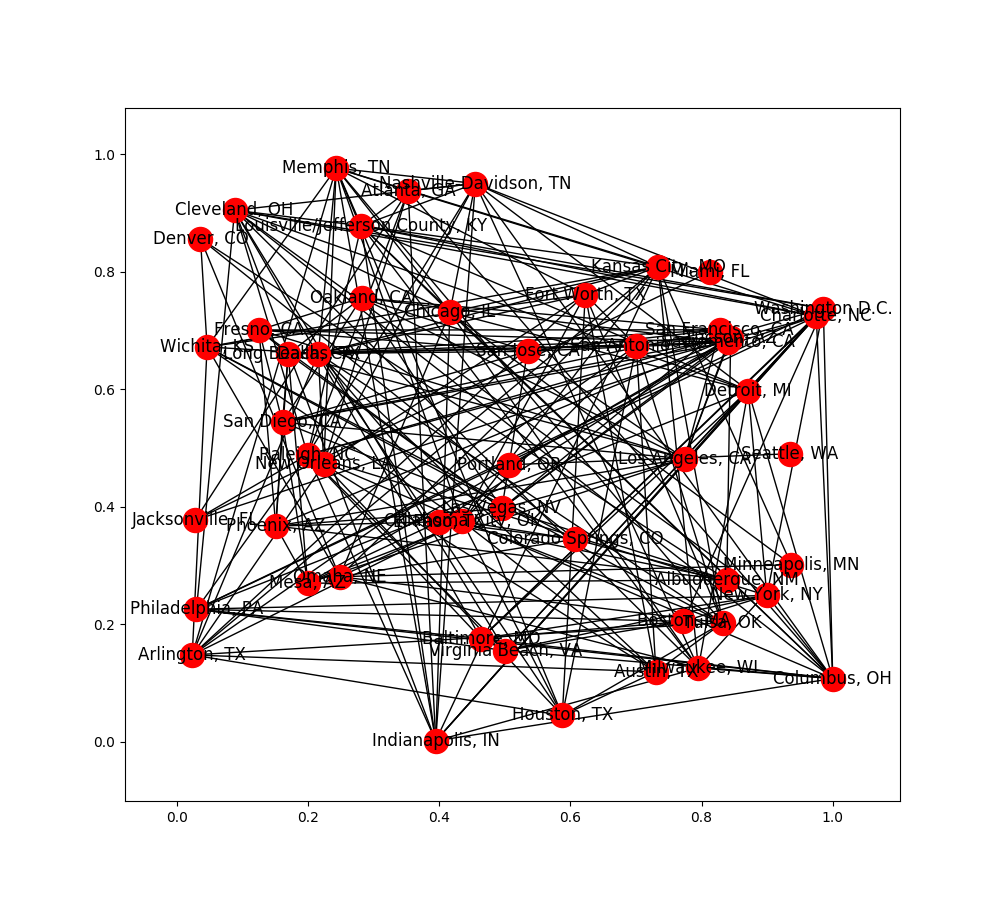

In [4]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


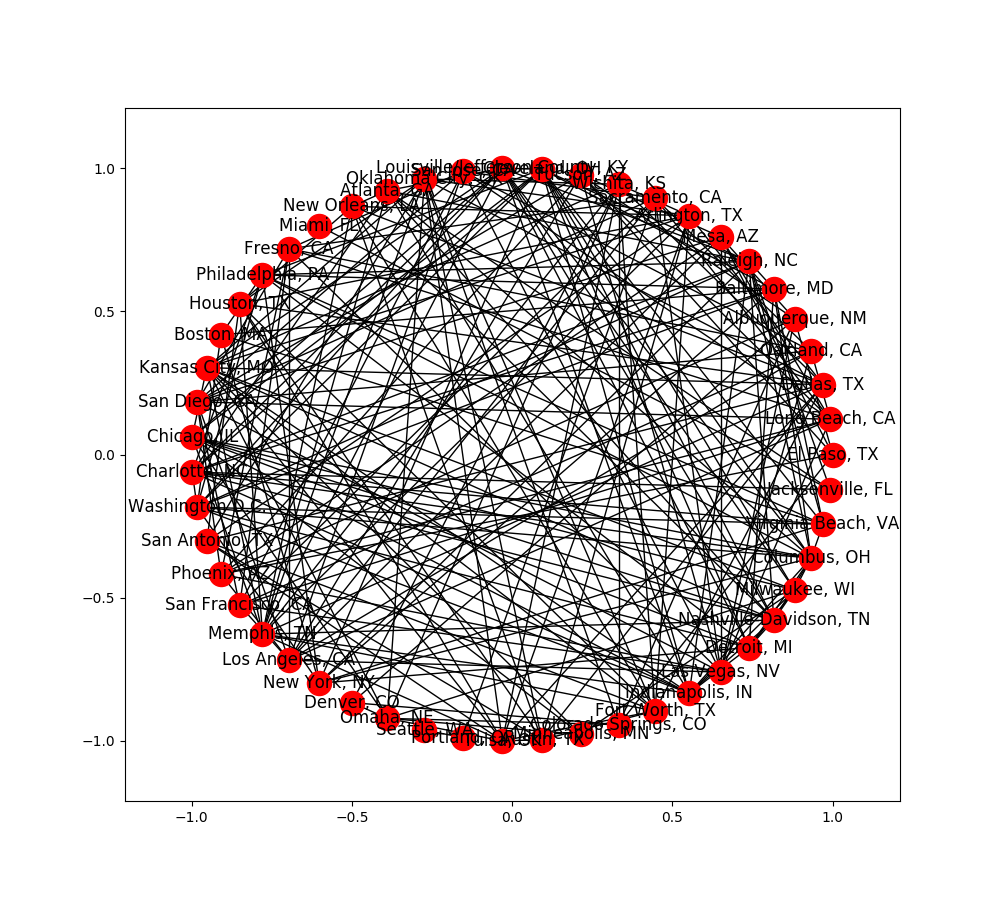

In [5]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


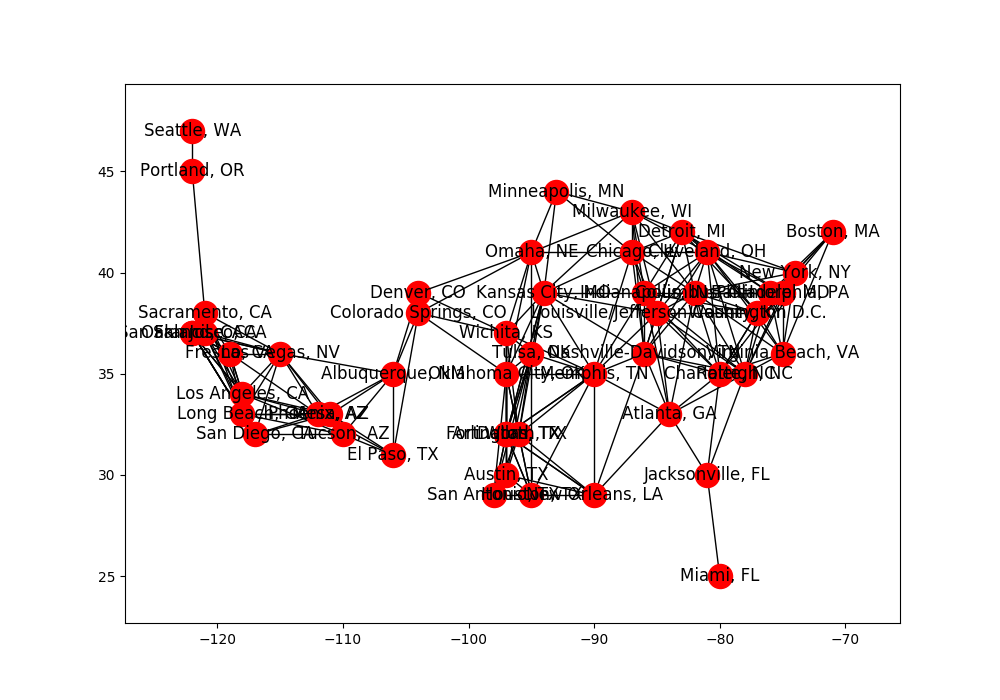

In [6]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


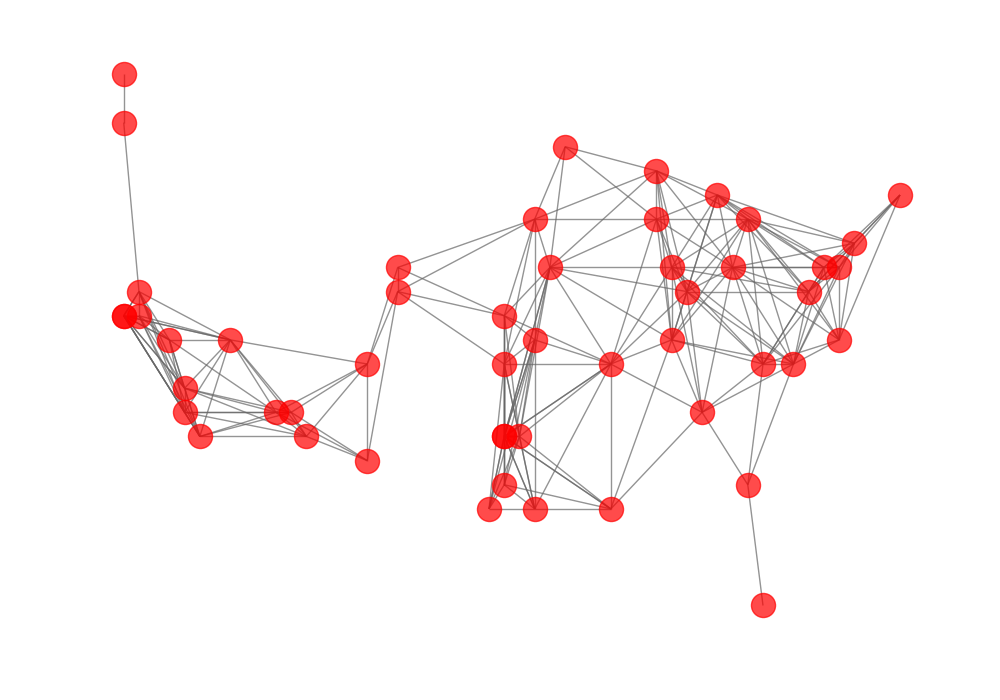

In [7]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


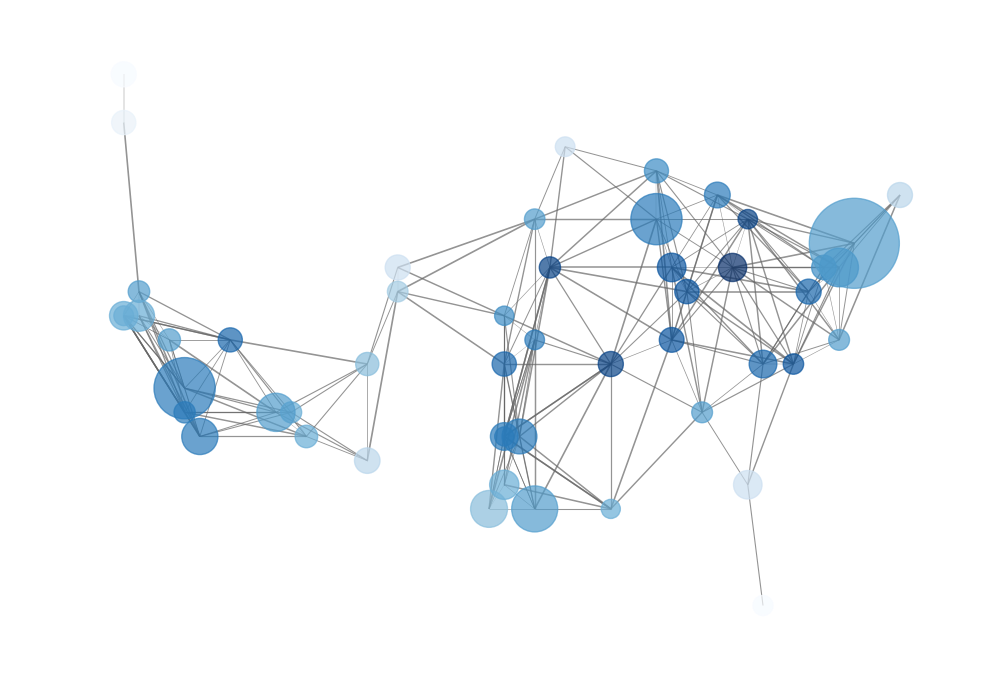

In [8]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


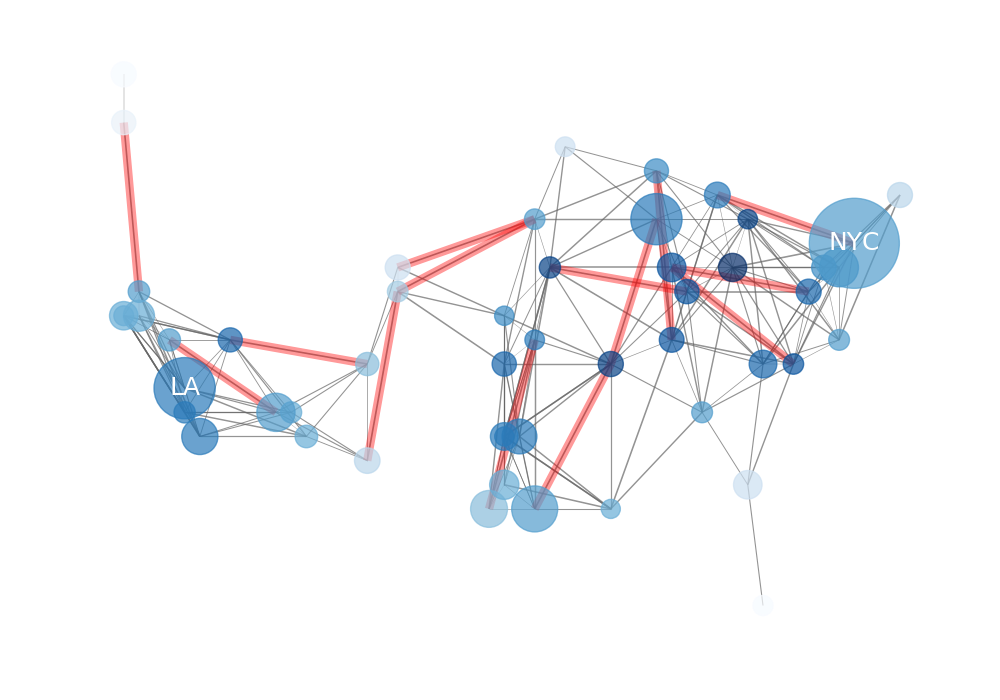

In [9]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

In [ ]:
# quiz
# example 1
g = nx.Graph()
g.add_edges_from(
    [
        ('A','B'), ('A','C'), ('A','D'), ('A','E'), ('A','F'),
        ('B','C'), ('B','F'), ('C','D'), ('C','F'),
        ('D','E'), ('D','F'),
        ('E','F')
    ]
)
nx.draw_networkx(g)

nx.clustering(g, 'F')

2


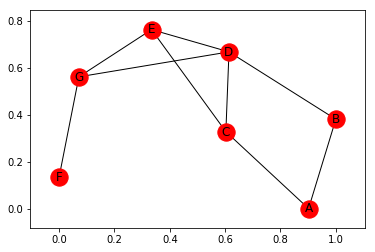

In [60]:
# example 3
g = nx.Graph()
g.add_edges_from(
    [
        ('A','B'), ('A','C'),
        ('B','D'),
        ('C','D'), ('C','E'),
        ('D','E'), ('D','G'),
        ('E','G'),
        ('G','F')
    ]
)
print(nx.radius(g))
print(nx.diameter(g))
nx.draw_networkx(g)

False
['D', 'E']
['A', 'F']
{'A': 4, 'B': 3, 'C': 3, 'D': 2, 'E': 2, 'G': 3, 'F': 4}


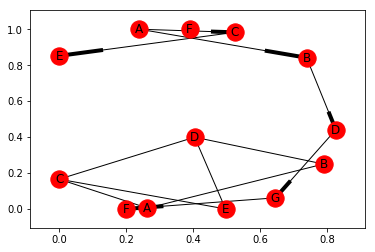

In [61]:
g_noG = g.copy()
g_noG.remove_node('G')
nx.draw_networkx(g_noG)
print(nx.is_connected(g_noG))
t = nx.bfs_tree(g, 'A')
nx.draw_networkx(t)
print(nx.center(g))
print(nx.periphery(g))
print(nx.eccentricity(g))


2

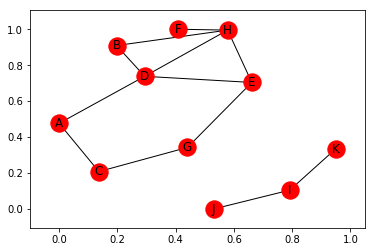

In [62]:
# example 4
g = nx.Graph()
g.add_edges_from(
    [
        ('A','C'), ('A','D'), ('C','G'), ('G','E'), ('D','E'),
        ('D','B'), ('D','H'), ('E','H'), ('B','H'), ('H','F'),
        ('I','J'), ('I', 'K')
    ]
)
nx.draw_networkx(g)
nx.is_connected(g)
nx.number_connected_components(g)


In [63]:
g_noEG = g.copy()
g_noEG.remove_edge('E', 'G')
nx.number_connected_components(g_noEG)

2

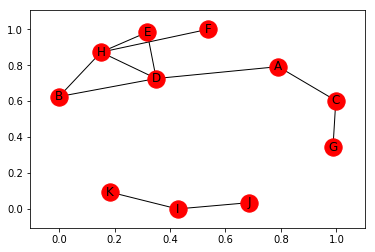

In [64]:
nx.draw_networkx(g_noEG)

In [65]:
nx.clustering(g, 'I'), nx.clustering(g, 'J'), nx.clustering(g, 'K'), 

(0.0, 0.0, 0.0)

In [66]:
g.add_edge('E', 'J')

In [67]:
nx.is_connected(g)

True

In [68]:
# example 5
g1 = nx.MultiDiGraph()
g2 = nx.MultiDiGraph()
g3 = nx.MultiDiGraph()

g1.add_edges_from(
    [
        ('A','B'), ('A','C'),
        ('B','C'), ('C','B'),
        ('D','C'), ('E','B'),
    ]
)

In [69]:
g2.add_edges_from(
    [
        ('A','D'), ('A','B'), ('B','A'), ('B','C'),
        ('A','C'), ('C','A'), ('D','E'), ('E','C')
    ]
)

In [70]:
g3.add_edges_from(
    [
        ('A','C'), ('B','A'), ('A','D'), ('C','B')
    ]
)

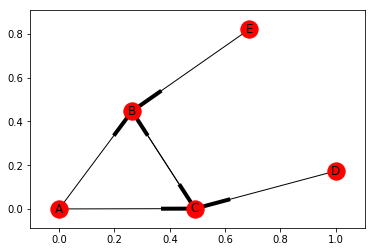

In [72]:
nx.draw_networkx(g1)

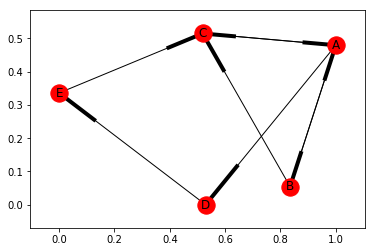

In [73]:
nx.draw_networkx(g2)

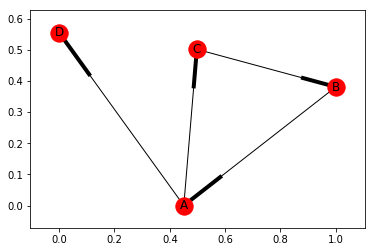

In [74]:
nx.draw_networkx(g3)

In [75]:
(nx.is_strongly_connected(g1),
 nx.is_strongly_connected(g2),
 nx.is_strongly_connected(g3))

(False, True, False)

In [76]:
g1_str = g1.copy()
g1_str.add_edge('C', 'D')
nx.is_strongly_connected(g1_str)

False

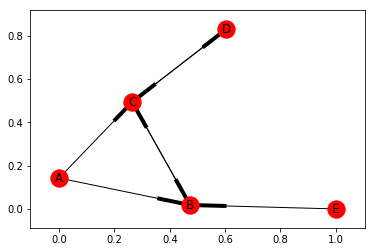

In [77]:
nx.draw_networkx(g1_str)

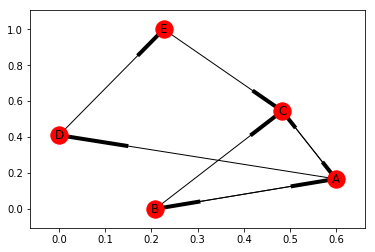

In [78]:
nx.draw_networkx(g2)

In [79]:
nx.node_connectivity(g2), nx.minimum_node_cut(g2)

(1, {'C'})

In [80]:
nx.edge_connectivity(g2), nx.minimum_edge_cut(g2)

(1, {('C', 'A')})

In [81]:
g3_str = g3.copy()
g3.add_edge('D', 'A')
nx.is_strongly_connected(g3_str)

False

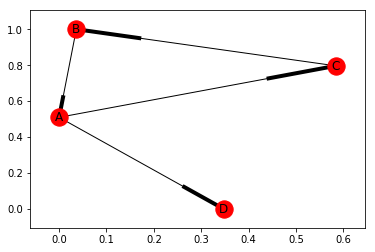

In [83]:
nx.draw_networkx(g3_str)

In [84]:
# example 7
g = nx.Graph()
g.add_edges_from(
    [
        ('A','B'), ('A','C'), ('A','F'),
        ('B','C'), ('B','D'), ('B','E'),
        ('C','E'), ('C','F'), 
        ('D','E'),
        ('E','F'), ('E','G'), ('E','H'), 
        ('G','H'), ('G','K'), ('G','M'),
        ('H','M'), ('H','N'), 
        ('K','M'), ('K','N')
    ]
)
nx.average_clustering(g), nx .transitivity(g)
#(0.5090909090909089, 0.4528301886792453)
nx.node_connectivity(g)

1

In [85]:
# example 8
nx.edge_connectivity(g)
#2
nx.edge_connectivity(g), nx.minimum_edge_cut(g)
#(2, {('G', 'E'), ('H', 'E')})
nx.node_connectivity(g), nx.minimum_node_cut(g)

(1, {'E'})

In [ ]:
# example 9
g = nx.DiGraph()
g.add_edges_from(
    [
        ('D','A'), ('D','B'), ('B','A'),
        ('A','C'), ('C','E'), ('C','B'),
        ('E','F'), ('E','H'), ('J','E'),
        ('H','J'), ('H','K'), ('K','J'), 
        ('F','H'), ('F','K'), ('F','G'),
        ('G','K')
    ]
)
len(sorted(nx.all_simple_paths(g, 'D', 'K')))